<h1>Base Statistical Analysis in Python<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Environment</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Loading</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Correlation</a></span><ul class="toc-item"><li><span><a href="#Continuous-Variables" data-toc-modified-id="Continuous-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Continuous Variables</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical Variables</a></span></li></ul></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypothesis Testing</a></span><ul class="toc-item"><li><span><a href="#T-Tests" data-toc-modified-id="T-Tests-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>T-Tests</a></span></li><li><span><a href="#Chi-Squared-Test" data-toc-modified-id="Chi-Squared-Test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chi-Squared Test</a></span></li></ul></li><li><span><a href="#Regression-Metric-Quantification" data-toc-modified-id="Regression-Metric-Quantification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regression Metric Quantification</a></span><ul class="toc-item"><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#$R^2$-Metric" data-toc-modified-id="$R^2$-Metric-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>$R^2$ Metric</a></span></li><li><span><a href="#Other-Regression-Metrics" data-toc-modified-id="Other-Regression-Metrics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Other Regression Metrics</a></span></li></ul></li><li><span><a href="#Classification-Metric-Quantification" data-toc-modified-id="Classification-Metric-Quantification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification Metric Quantification</a></span><ul class="toc-item"><li><span><a href="#Accuracy-vs.-Precision" data-toc-modified-id="Accuracy-vs.-Precision-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Accuracy vs. Precision</a></span></li><li><span><a href="#Confusion-Matricies" data-toc-modified-id="Confusion-Matricies-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Confusion Matricies</a></span></li><li><span><a href="#AUC-ROC-Curves" data-toc-modified-id="AUC-ROC-Curves-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>AUC-ROC Curves</a></span></li></ul></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distributions</a></span><ul class="toc-item"><li><span><a href="#Normal-Distributions" data-toc-modified-id="Normal-Distributions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Normal Distributions</a></span></li><li><span><a href="#Skewed-Distributions" data-toc-modified-id="Skewed-Distributions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Skewed Distributions</a></span></li></ul></li><li><span><a href="#Bayesian-Statistics" data-toc-modified-id="Bayesian-Statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bayesian Statistics</a></span><ul class="toc-item"><li><span><a href="#Probabilities" data-toc-modified-id="Probabilities-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Probabilities</a></span></li></ul></li></ul></div>

# Environment

## Libraries

In [143]:
import numpy as np
import pandas as pd
import scipy

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import seaborn as sn
from scikitplot.metrics import plot_confusion_matrix, plot_precision_recall

## Data Loading

In [90]:
df = pd.read_csv('/Users/ClayElmore/Desktop/gitClay/My_Learning_General_ML_/datasets/datasets_729058_1265963_Churn_Modelling.csv')
drop_cols = ['RowNumber','CustomerId','Surname']
cont_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['HasCrCard','IsActiveMember', 'Geography', 'Gender']
y_var = ['Exited']
df = df.drop(drop_cols, axis=1)

# Correlation

## Continuous Variables

In [91]:
df[cont_cols + y_var].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


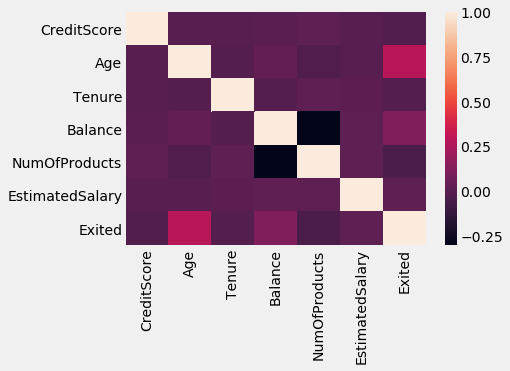

In [93]:
sn.heatmap(df[cont_cols+y_var].corr())
plt.show()

## Categorical Variables

# Hypothesis Testing

## T-Tests

In [98]:
group1 = df.sample(1000).EstimatedSalary
group2 = df.sample(1000).EstimatedSalary

In [99]:
scipy.stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=-0.3088066505163061, pvalue=0.7575008051278113)

Large p value indicates that we cannot reject the hull hypothesis of similar means

## Chi-Squared Test

In [101]:
count1 = df.sample(5000).Geography.value_counts()*2
count2 = df.Geography.value_counts().loc[count1.index]

In [102]:
scipy.stats.chisquare(count1, count2)

Power_divergenceResult(statistic=0.9900245665962375, pvalue=0.6095634198011162)

Large p value means we cannot reject the null hypothesis of correct sampling

# Regression Metric Quantification

## Model Creation

In [110]:
dfl = pd.read_csv('../../datasets/portland.csv')
dfl.columns = ['sf', 'br', 'price']
model = LinearRegression()
model.fit(dfl[['sf', 'br']], dfl.price)
pred = model.predict(dfl[['sf', 'br']])

## $R^2$ Metric

In [111]:
print(f'R^2: {metrics.r2_score(dfl.price, pred)}')

R^2: 0.7343207791741682


## Other Regression Metrics

In [112]:
print(f'MAE : {metrics.mean_absolute_error(dfl.price, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(dfl.price, pred)):.2f}')

MAE : 51589.45
RMSE: 64288.46


# Classification Metric Quantification

In [189]:
train, test = train_test_split(df)
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf.fit(train[cont_cols], train[y_var])
pred = rf.predict(test[cont_cols])
prob = rf.predict_proba(test[cont_cols])

/Users/ClayElmore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Accuracy vs. Precision

In [190]:
print(f'Accuracy : {metrics.accuracy_score(test[y_var], pred)*100:.2f}%')
print(f'Precision: {metrics.precision_score(test[y_var], pred)*100:.2f}%')

Accuracy : 82.48%
Precision: 67.91%


## Confusion Matricies

In [191]:
metrics.confusion_matrix(test[y_var], pred) / pred.shape[0] * 100

array([[74.44,  3.8 ],
       [13.72,  8.04]])

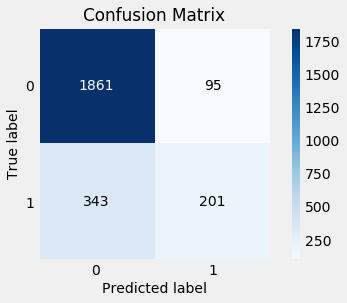

In [192]:
plot_confusion_matrix(test[y_var], pred)
plt.show()

## AUC-ROC Curves

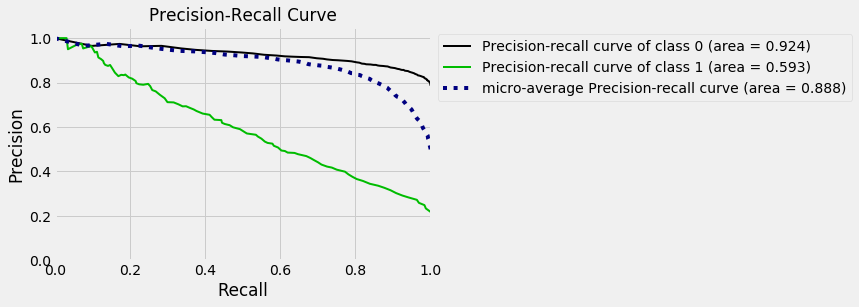

In [193]:
fig, ax = plt.subplots()
plot_precision_recall(test[y_var], prob, ax=ax)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

# Distributions

## Normal Distributions

## Skewed Distributions

# Bayesian Statistics

## Probabilities